Лабораторная работа №5. Анализ главных компонент PCA.
Цель работы - снижение признаков с помощью анализа главных компонент (PCA).


Набор данных растений 

 Задача №1

Дан набор признаков, и требуется сократить количество признаков, сохраняя при этом дисперсию данных. Использовать анализ главных компонент с помощью класса РСА библиотеки scikit- leam.

Задача №2

Уменьшение количества признаков, когда данные линейно неразделимы. Вы подозреваете, что ваши данные линейно неразделимы, и требуется сократить размерности. Применить расширение анализа главных компонент, в котором используются ядра для нелинейного уменьшения размерности.

Задача №3

Визуализация PCA на примере набора данных.

Задача №4

Сжатие изображений с помощью PCA.


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

Задача №1: Снижение признаков с помощью анализа главных компонент (PCA)
Импорт необходимых библиотек:

In [2]:
# StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler
# PCA для анализа главных компонент
from sklearn.decomposition import PCA
# pandas для работы с данными в формате DataFrame
import pandas as pd
# matplotlib для построения графиков
import matplotlib.pyplot as plt


Загрузка данных: Для загрузки данных растений используем Seed Dataset.
Seed Dataset https://archive.ics.uci.edu/dataset/236/seeds. Данные включают следующие характеристики семян:

Площадь
Периметр
Компактность
Длина ядра
Ширина ядра
Коэффициент симметрии
Длина борозды ядра

In [3]:
# Загрузим набор данных
file_path = "/kaggle/input/seeds-dataset/seeds_dataset.txt"
data = pd.read_csv(file_path, delim_whitespace=True, header=None)
print(data.head())
print(data.columns)
data.columns = ['area A', 'perimeter P', 'compactness C = 4*pi*A/P^2', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class'] 
print(data.head())

# Стандартизируем признаки
features = data.iloc[:, :-1] #извлечение признаков
features_scaled = StandardScaler().fit_transform(features)


       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')
   area A  perimeter P  compactness C = 4*pi*A/P^2  length of kernel  \
0   15.26        14.84                      0.8710             5.763   
1   14.88        14.57                      0.8811             5.554   
2   14.29        14.09                      0.9050             5.291   
3   13.84        13.94                      0.8955             5.324   
4   16.14        14.99                      0.9034             5.658   

   width of kernel  asymmetry coefficient  length of kernel groove  class  
0            3.312                  2.221                    5.220      1  
1            3.333                  1.

/tmp/ipykernel_30/3320662073.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


Создадим объект PCA, который сохранит 99% дисперсии:


In [4]:
pca = PCA(n_components=0.99)
features_pca = pca.fit_transform(features_scaled)


In [5]:
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков:", features_pca.shape[1])


Исходное количество признаков: 7
Сокращенное количество признаков: 4


Задача №2: Нелинейное уменьшение размерности с помощью ядерного PCA
Импорт KernelPCA:

In [6]:
from sklearn.decomposition import KernelPCA


Применение Kernel PCA с RBF ядром:

In [7]:
# Применяем ядровой метод анализа главных компонент с RBF ядром
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=2)  # Создаем объект KernelPCA для снижения размерности до 2
features_kpca = kpca.fit_transform(features_scaled)  # Преобразуем стандартизированные признаки в новое пространство


In [8]:
print("Исходное количество признаков:", features.shape[1])
print("Сокращенное количество признаков с Kernel PCA:", features_kpca.shape[1])


Исходное количество признаков: 7
Сокращенное количество признаков с Kernel PCA: 2


Задача №3: Визуализация результатов PCA
Визуализация двух компонент PCA:

3


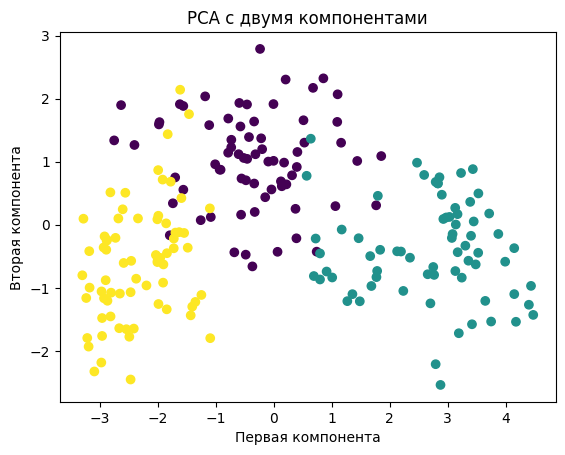

In [9]:
print(data['class'].nunique())

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=data['class'], cmap='viridis')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.title('PCA с двумя компонентами')
plt.show()


Задача №4

Сжатие изображений с помощью PCA.

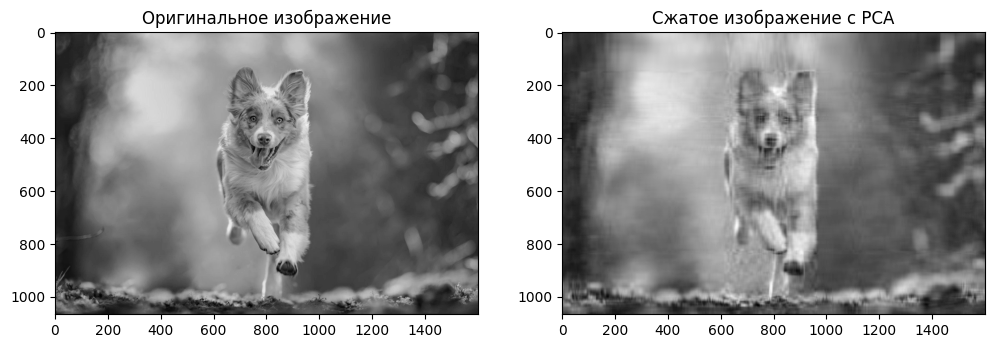

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io

# Загрузка изображения и преобразование его в оттенки серого
image = io.imread('/kaggle/input/cats-and-dogs-image-classification/train/dogs/dog_0.jpg', as_gray=True) 
original_shape = image.shape

# Преобразование 2D изображения в 1D массив для применения PCA
flattened_image = image.flatten().reshape(-1, original_shape[1])

# Применение PCA с количеством компонент, достаточным для сохранения 95% дисперсии
pca = PCA(0.95)  # Сохранение 95% информации
compressed_image = pca.fit_transform(flattened_image)

# Восстановление изображения из компонент PCA
restored_image = pca.inverse_transform(compressed_image)
restored_image = restored_image.reshape(original_shape)

# Визуализация оригинального и восстановленного изображения
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Оригинальное изображение')
ax[1].imshow(restored_image, cmap='gray')
ax[1].set_title('Сжатое изображение с PCA')
plt.show()
